# Testing everything

In [1]:
import pandas as pd
from datetime import datetime
from googlesearch import search
import time

In [2]:
def get_symbol_info(symbol: str):
    url1 = 'https://markets.ft.com/data/funds/tearsheet/performance?s={}'.format(symbol)
    try:
        df1 = pd.read_html(url1)[0]

        ds_perform = df1.loc[0].drop(['Unnamed: 0']).apply(lambda x: None if x[:-1] == '-' else float(x[:-1])/100.0)
        ds_perform['ft category'] = df1.loc[1]['Unnamed: 0']


        url2 = 'https://markets.ft.com/data/funds/tearsheet/historical?s={}'.format(symbol)
        df_quotes = pd.read_html(url2)[0]
        df_quotes['Date'] = df_quotes['Date'].apply(lambda x: x[:-17]).apply(lambda x: pd.to_datetime(x, infer_datetime_format = True).date())
        ds_quotes = df_quotes.set_index('Date',drop=True)['Close']

        ds_cat_perform = df1.loc[1].drop(['Unnamed: 0']).apply(lambda x: None if x[:-1] == '-' else float(x[:-1])/100.0)
        ds_cat_perform['ft category'] = df1.loc[1]['Unnamed: 0']

        url3 = 'https://markets.ft.com/data/funds/tearsheet/risk?s={}'.format(symbol)
        data = pd.read_html(url3)
        ds_risk = pd.concat([data[0], data[1]]).set_index('Unnamed: 0')['Fund']
        ds_cat_risk = pd.concat([data[0], data[1]]).set_index('Unnamed: 0')['Category average']
    except Exception as e:
        ds_perform, ds_cat_perform, ds_quotes,ds_risk, ds_cat_risk = None, None, None, None, None
    
    return ds_perform, ds_cat_perform, ds_quotes,ds_risk, ds_cat_risk
   

In [3]:
fund_list_file = 'fund_symbols.csv'
df = pd.read_csv(fund_list_file)[['symbol','name','category','risk','currency']].drop_duplicates(subset=['symbol'])
data = []
data_cat = []
dic_quote = dict()
for _,fund in df.iterrows():
    ds_perform, ds_cat_perform, ds_quotes,ds_risk, ds_cat_risk = get_symbol_info(fund['symbol'])
    if ds_perform is not None and ds_risk['Standard deviation'] != '--':
        lst = fund.to_list()
        lst += ds_perform.to_list()
        lst += [float(ds_risk['Standard deviation'][:-1])/100.0]
        lst += [ds_quotes.std()]
        lst_cat = fund[['category','risk']].to_list()
        lst_cat += ds_cat_perform.to_list()
        data.append(lst)
        data_cat.append(lst_cat)
        dic_quote[fund['symbol']] = ds_quotes
columns = ['symbol','name','category','risk','currency','5 years', '3 years', '1 year', '6 months', '3 months', '1 month', 'ft category', '1 year std', '1 month std']
columns_cat = ['m category','risk', '5 years', '3 years', '1 year', '6 months', '3 months', '1 month', 'ft category']
df_fund = pd.DataFrame(data=data, columns=columns).drop_duplicates(subset=['symbol'])
df_cat = pd.DataFrame(data=data_cat, columns=columns_cat).drop_duplicates(subset=['ft category'])
df_quote = pd.DataFrame(data=dic_quote)

In [4]:
df_quote_interp = df_quote.interpolate()

In [5]:
df_cat.sort_values(by='1 month',ascending=False).head(30)


,m category,risk,5 years,3 years,1 year,6 months,3 months,1 month,ft category
0,Ações Turquia,7,-0.0539,0.0584,0.2409,0.3848,0.2213,0.2396,Turkey Equity
59,Ações Sector Infra-estrutura,5,0.0749,0.1192,0.6654,0.2803,0.0536,0.1373,Sector Equity Energy
161,Mistos Moderados USD,5,0.1707,0.2618,0.0373,0.2314,0.1681,0.1070,Sector Equity Alternative Energy
175,Ações Global Frontier Markets,5,0.0362,0.0869,0.1018,0.0584,0.0774,0.0909,Global Frontier Markets Equity
146,Ações Tailândia,6,0.0108,-0.0466,0.0964,0.0180,0.0152,0.0781,Thailand Equity
29,Ações Indonésia,6,-0.0072,-0.0095,0.3029,0.1493,0.0579,0.0772,Indonesia Equity
243,Ações EUA Cap. Pequena,6,0.1096,0.1204,0.0096,0.1040,0.1428,0.0660,US Small-Cap Equity
34,Ações Sector Infra-estrutura,6,0.0515,0.0607,0.1373,0.1548,0.0513,0.0611,Sector Equity Infrastructure
225,Ações Índia,6,0.0746,0.1478,0.1102,0.0912,0.1190,0.0578,India Equity
232,Ações EUA Cap. Média,6,0.1024,0.1122,0.0529,0.1097,0.1061,0.0552,US Mid-Cap Equity


In [6]:
df_fund = df_fund.drop_duplicates(subset=['symbol'])
df_fund['my 1 month'] = df_fund.apply(lambda x: (df_quote_interp.iloc[-1]/df_quote_interp.iloc[0]-1)[x['symbol']],axis=1)
df_fund.sort_values(by='my 1 month',ascending=False).head(20)


,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month
59,LU1046545411:USD,GS Global Infras Eq Base Acc USD,Ações Sector Infra-estrutura,5,USD,0.1125,0.1878,0.8074,0.3710,0.0833,0.1592,Sector Equity Energy,0.2712,0.323470,0.135198
0,LU0213962813:EUR,HSBC GIF Turkey Equity EC,Ações Turquia,7,EUR,-0.0153,0.1053,0.3439,0.5925,0.2867,0.2612,Turkey Equity,0.3969,1.671679,0.133333
266,LU0661986348:EUR,JPM Euroland Dynamic D perf (acc) EUR,Ações Euro Cap. Grande,6,EUR,0.0158,0.0510,-0.1213,-0.0024,-0.0300,0.0188,Eurozone Large-Cap Equity,0.1594,6.731373,0.083517
169,LU1670707956:USD,M&G (Lux) Eurp Strat Val A USD Acc,Ações Europa Cap. Grande Valor,6,USD,0.0280,0.0729,0.0329,0.0204,-0.0476,0.0228,Europe Large-Cap Value Equity,0.1291,0.239130,0.083333
221,LU1670628061:USD,M&G (Lux) North Amer Div A USD Dis,Ações EUA Dividendo,6,USD,0.1277,0.1172,0.1033,0.1388,0.0965,0.0323,US Equity Income,0.1787,0.593974,0.082949
232,LU0090841858:USD,BGF US Small & MidCap Opps E2,Ações EUA Cap. Média,6,USD,0.1035,0.1286,0.1425,0.1095,0.0507,0.0386,US Mid-Cap Equity,0.1408,5.800321,0.074354
35,LU0122380701:USD,BGF World Healthscience E2,Ações Sector Saúde,6,USD,0.1125,0.1006,0.0574,0.1407,0.0390,-0.0012,Sector Equity Healthcare,0.1242,1.284866,0.073294
46,LU0115765678:EUR,Fidelity Iberia E-Acc-EUR,Ações Espanha,6,EUR,-0.0289,-0.0378,-0.1239,0.0086,-0.0227,-0.0058,Spain Equity,0.1101,1.070518,0.072544
262,LU0717747835:EUR,Invesco Pan European Focus Eq E EUR Acc,Ações Europa Cap. Grande Valor,6,EUR,0.0110,0.0590,-0.0513,-0.0042,-0.0493,0.0224,Europe Large-Cap Value Equity,0.1605,0.541215,0.072315
237,LU0219441572:USD,MFS Meridian Global Concntr A1 USD,Ações Global Cap. Grande Misto,6,USD,0.0868,0.0871,-0.0162,0.0485,0.0673,0.0337,Global Large-Cap Blend Equity,0.1401,1.658456,0.071087


In [7]:
s_to_n = df_fund[['symbol','name']].set_index('symbol')['name'].to_dict()

<AxesSubplot:xlabel='Date'>

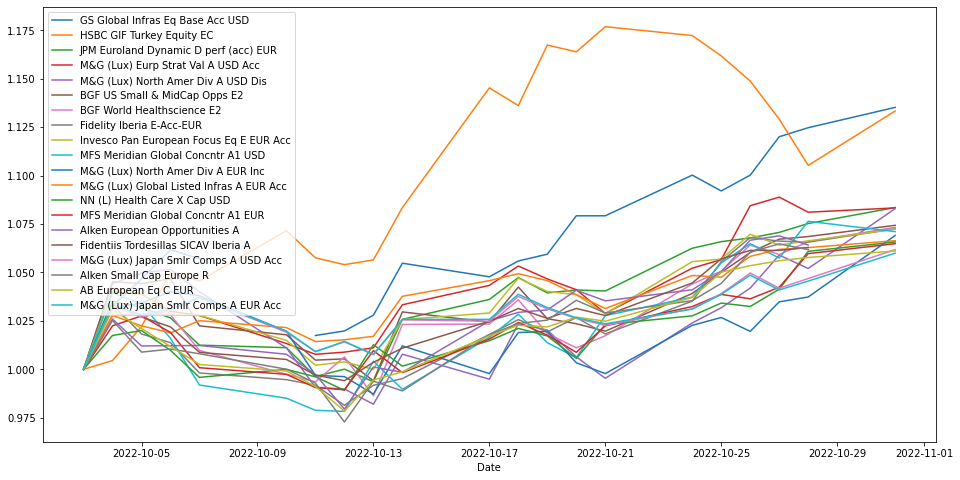

In [8]:
top_month = df_fund.sort_values(by='my 1 month',ascending=False).head(20)['symbol']
df_quote.apply(lambda x: x/df_quote.iloc[0],axis=1)[top_month].rename(columns=s_to_n).plot(figsize=(16,8))

In [9]:
df_fund['1 month racio'] = df_fund['my 1 month'] / df_fund['1 month std']
df_fund.sort_values(by='1 month racio',ascending=False).head(10)


,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio
144,IE00BBPRD471:EUR,Invesco Real Return (EUR) Bond E EUR Acc,Obrigações Flexível Globais-EUR Hedged,4,EUR,0.0075,-0.0035,-0.0764,-0.0139,-0.0178,0.0026,EUR Flexible Allocation - Global,0.0710,0.008507,0.009174,1.078447
99,IE00B4Z6MP99:EUR,BNY Mellon Glbl Rl Ret (EUR) A Inc,Mistos Flexíveis EUR - Global,4,EUR,0.0126,0.0015,-0.0718,-0.0115,-0.0165,0.0031,EUR Flexible Allocation - Global,0.0710,0.010712,0.006993,0.652849
59,LU1046545411:USD,GS Global Infras Eq Base Acc USD,Ações Sector Infra-estrutura,5,USD,0.1125,0.1878,0.8074,0.3710,0.0833,0.1592,Sector Equity Energy,0.2712,0.323470,0.135198,0.417962
169,LU1670707956:USD,M&G (Lux) Eurp Strat Val A USD Acc,Ações Europa Cap. Grande Valor,6,USD,0.0280,0.0729,0.0329,0.0204,-0.0476,0.0228,Europe Large-Cap Value Equity,0.1291,0.239130,0.083333,0.348485
204,IE00BYX5NX33:EUR,Fidelity MSCI Emerg Mkts Indx EUR P Acc,Ações Emergentes Global,6,EUR,NaN,0.1240,0.0348,0.0687,0.0855,0.0531,Global Large-Cap Blend Equity,0.1474,0.127768,0.042471,0.332406
91,LU1797811236:EUR,M&G (Lux) Global Listed Infras A EUR Acc,Ações Sector Infra-estrutura,6,EUR,0.0373,0.0822,0.0463,0.0372,-0.0405,0.0245,Europe Large-Cap Value Equity,0.1326,0.207420,0.066427,0.320256
166,LU1797817787:EUR,M&G (Lux) Japan Smlr Comps A EUR Acc,Ações Japão Cap. Peq/Média,6,EUR,NaN,0.1727,0.0969,0.1657,0.0719,0.0153,Other Equity,0.1296,0.188598,0.059985,0.318057
203,IE00BYX5NK04:USD,Fidelity MSCI Emerg Mkts Indx USD P Acc,Ações Emergentes Global,6,USD,NaN,0.1240,0.0348,0.0687,0.0855,0.0531,Global Large-Cap Blend Equity,0.1474,0.155932,0.048232,0.309311
219,LU1797812986:EUR,M&G (Lux) Glb Corp Bd A H EUR Inc,Obrigações Corp. Globais - EUR Hedged,4,EUR,-0.0124,-0.0199,-0.0547,-0.0310,-0.0263,0.0140,Global High Yield Bond - EUR Hedged,0.0628,0.036095,0.011044,0.305974
160,LU1797817514:USD,M&G (Lux) Japan Smlr Comps A USD Acc,Ações Japão Cap. Peq/Média,6,USD,NaN,0.2292,0.3076,0.3052,0.1566,0.0416,Other Equity,0.1305,0.207131,0.061790,0.298312


In [10]:
df_fund['1 week'] = df_fund.apply(lambda x: (df_quote_interp.iloc[-1]/df_quote_interp.iloc[-6]-1)[x['symbol']],axis=1)
df_fund['1 week racio'] = df_fund['1 week'] / df_fund['1 month std']
df_fund.sort_values(by='1 week',ascending=False).head(10)

,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
216,IE00B8HXHJ53:USD,Neuberger Bm US Rel Est Sec USD A Acc,Imobiliário Indirecto América do Norte,6,USD,0.0734,0.0462,0.0710,0.0757,0.0589,0.0410,Property - Indirect North America,0.2188,0.376704,-0.000742,-0.001969,0.058962,0.156521
221,LU1670628061:USD,M&G (Lux) North Amer Div A USD Dis,Ações EUA Dividendo,6,USD,0.1277,0.1172,0.1033,0.1388,0.0965,0.0323,US Equity Income,0.1787,0.593974,0.082949,0.139651,0.057606,0.096984
213,LU0108459040:USD,Candriam Eqs L Biotech C USD Cap,Ações Sector Biotecnologia,6,USD,0.0810,0.1178,0.0432,0.2772,0.1917,0.0722,Sector Equity Biotechnology,0.1824,13.612658,0.059963,0.004405,0.047187,0.003466
215,LU0133359157:USD,Candriam Eqs L Biotech N USD Cap,Ações Sector Biotecnologia,6,USD,0.0760,0.1126,0.0383,0.2743,0.1903,0.0718,Sector Equity Biotechnology,0.1823,9.739802,0.059653,0.006125,0.047148,0.004841
223,LU1670627253:EUR,M&G (Lux) North Amer Div A EUR Inc,Ações EUA Dividendo,6,EUR,0.1291,0.1180,0.1088,0.1531,0.1025,0.0332,US Equity Income,0.1761,0.640010,0.069094,0.107958,0.045344,0.070849
50,LU0329760853:EUR,DWS Invest Global Infras NC,Ações Sector Infra-estrutura,6,EUR,0.0726,0.0752,0.2074,0.2107,0.0503,0.0580,Sector Equity Infrastructure,0.1724,3.625277,0.001441,0.000397,0.043473,0.011992
60,LU1512665842:EUR,GS Global Infras Eq Oth Ccy Acc EUR,Ações Sector Infra-estrutura,5,EUR,0.0715,0.0638,0.1948,0.2125,0.0614,0.0671,Sector Equity Infrastructure,0.1695,0.283260,0.012160,0.042930,0.041973,0.148180
245,IE00BLDYK493:USD,Neuberger Berman US Sm Cap USD A Inc,Ações EUA Cap. Pequena,6,USD,0.1227,0.1151,0.0426,0.1009,0.1616,0.0615,US Small-Cap Equity,0.1670,0.346073,0.051081,0.147601,0.040181,0.116107
243,IE00B64QTZ34:USD,Neuberger Berman US Sm Cap USD A Acc,Ações EUA Cap. Pequena,6,USD,0.1227,0.1151,0.0424,0.1012,0.1611,0.0618,US Small-Cap Equity,0.1674,0.537934,0.051163,0.095110,0.040167,0.074670
239,LU1670628905:USD,M&G (Lux) Glb Themes A USD Acc,Ações Global Cap. Grande Misto,6,USD,NaN,0.1030,0.0356,0.0864,0.0433,0.0208,Global Large-Cap Blend Equity,0.1371,0.244205,0.052856,0.216441,0.039562,0.162004


In [11]:
df_fund[df_fund['my 1 month']>0.0].sort_values(by='1 week',ascending=False).head(10)

,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
221,LU1670628061:USD,M&G (Lux) North Amer Div A USD Dis,Ações EUA Dividendo,6,USD,0.1277,0.1172,0.1033,0.1388,0.0965,0.0323,US Equity Income,0.1787,0.593974,0.082949,0.139651,0.057606,0.096984
213,LU0108459040:USD,Candriam Eqs L Biotech C USD Cap,Ações Sector Biotecnologia,6,USD,0.0810,0.1178,0.0432,0.2772,0.1917,0.0722,Sector Equity Biotechnology,0.1824,13.612658,0.059963,0.004405,0.047187,0.003466
215,LU0133359157:USD,Candriam Eqs L Biotech N USD Cap,Ações Sector Biotecnologia,6,USD,0.0760,0.1126,0.0383,0.2743,0.1903,0.0718,Sector Equity Biotechnology,0.1823,9.739802,0.059653,0.006125,0.047148,0.004841
223,LU1670627253:EUR,M&G (Lux) North Amer Div A EUR Inc,Ações EUA Dividendo,6,EUR,0.1291,0.1180,0.1088,0.1531,0.1025,0.0332,US Equity Income,0.1761,0.640010,0.069094,0.107958,0.045344,0.070849
50,LU0329760853:EUR,DWS Invest Global Infras NC,Ações Sector Infra-estrutura,6,EUR,0.0726,0.0752,0.2074,0.2107,0.0503,0.0580,Sector Equity Infrastructure,0.1724,3.625277,0.001441,0.000397,0.043473,0.011992
60,LU1512665842:EUR,GS Global Infras Eq Oth Ccy Acc EUR,Ações Sector Infra-estrutura,5,EUR,0.0715,0.0638,0.1948,0.2125,0.0614,0.0671,Sector Equity Infrastructure,0.1695,0.283260,0.012160,0.042930,0.041973,0.148180
245,IE00BLDYK493:USD,Neuberger Berman US Sm Cap USD A Inc,Ações EUA Cap. Pequena,6,USD,0.1227,0.1151,0.0426,0.1009,0.1616,0.0615,US Small-Cap Equity,0.1670,0.346073,0.051081,0.147601,0.040181,0.116107
243,IE00B64QTZ34:USD,Neuberger Berman US Sm Cap USD A Acc,Ações EUA Cap. Pequena,6,USD,0.1227,0.1151,0.0424,0.1012,0.1611,0.0618,US Small-Cap Equity,0.1674,0.537934,0.051163,0.095110,0.040167,0.074670
239,LU1670628905:USD,M&G (Lux) Glb Themes A USD Acc,Ações Global Cap. Grande Misto,6,USD,NaN,0.1030,0.0356,0.0864,0.0433,0.0208,Global Large-Cap Blend Equity,0.1371,0.244205,0.052856,0.216441,0.039562,0.162004
155,LU1864481467:USD,Candriam Eqs L Oncology Imp C USD Cap,Ações Sector Saúde,6,USD,NaN,0.1277,0.0029,0.1878,0.0982,0.0266,Sector Equity Healthcare,0.1449,4.949195,0.056310,0.011378,0.038267,0.007732


In [12]:
df_fund[df_fund['my 1 month']>0.0].sort_values(by='1 week racio',ascending=False).head(20)

,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
144,IE00BBPRD471:EUR,Invesco Real Return (EUR) Bond E EUR Acc,Obrigações Flexível Globais-EUR Hedged,4,EUR,0.0075,-0.0035,-0.0764,-0.0139,-0.0178,0.0026,EUR Flexible Allocation - Global,0.0710,0.008507,0.009174,1.078447,0.018519,2.176866
99,IE00B4Z6MP99:EUR,BNY Mellon Glbl Rl Ret (EUR) A Inc,Mistos Flexíveis EUR - Global,4,EUR,0.0126,0.0015,-0.0718,-0.0115,-0.0165,0.0031,EUR Flexible Allocation - Global,0.0710,0.010712,0.006993,0.652849,0.014085,1.314892
172,LU1952109004:USD,T. Rowe Price Glb Alloc A USD,Mistos Moderados USD,5,USD,NaN,NaN,-0.0814,0.0075,0.0307,0.0641,Global Emerging Markets Bond,0.1086,0.093674,0.010309,0.110055,0.031579,0.337116
138,LU0963865083:USD,abrdn Frntr Mkts Bd A MInc USD,Obrigações Emergentes Globais,4,USD,0.0161,-0.0191,-0.0677,-0.0231,0.0117,0.0911,Global Emerging Markets Bond,0.1285,0.081454,0.016418,0.201560,0.027149,0.333308
69,IE00B7BTH691:USD,Neuberger Berman Strat Inc A USD MD,Obrigações Flexíveis USD,4,USD,0.0319,0.0194,0.0628,0.0696,0.0590,0.0209,USD Flexible Bond,0.0681,0.059622,0.003778,0.063372,0.016582,0.278113
132,LU1625225237:EUR,Invesco Global Ttl Ret EUR Bd E EUR Acc,Obrigações Flexível Globais-EUR Hedged,3,EUR,-0.0077,-0.0243,-0.0667,-0.0257,-0.0240,-0.0021,Global Flexible Bond - EUR Hedged,0.0505,0.074874,0.016097,0.214981,0.020202,0.269812
133,LU0534240741:EUR,Invesco Global Ttl Ret EUR Bd E EUR QD,Obrigações Flexível Globais-EUR Hedged,3,EUR,-0.0161,-0.0325,-0.0746,-0.0298,-0.0261,-0.0029,Global Flexible Bond - EUR Hedged,0.0504,0.079276,0.015282,0.192765,0.020154,0.254219
142,IE00B7FTJT25:USD,BlueBay Global High Yield Bd R USD,Obrigações Alto Rend. Globais,4,USD,-0.0099,-0.0292,0.0191,0.0522,0.0694,0.0262,USD High Yield Bond,0.0887,0.063715,0.016771,0.263225,0.015707,0.246515
121,LU0815116750:USD,Capital Group EM Tot Opp (LUX) Bgd,Mistos Mercados Emergentes Globais,5,USD,0.0085,0.0086,-0.0711,0.0036,0.0386,0.0529,Global Emerging Markets Allocation,0.0812,0.061153,0.002817,0.046063,0.014245,0.232939
66,LU1496042869:EUR,Carmignac Pf Global Bond Inc A EUR,Obrigações Globais,3,EUR,-0.0205,-0.0210,-0.0595,-0.0103,-0.0063,0.0062,EUR Cautious Allocation - Global,0.0484,0.027911,0.004215,0.151012,0.006336,0.226997


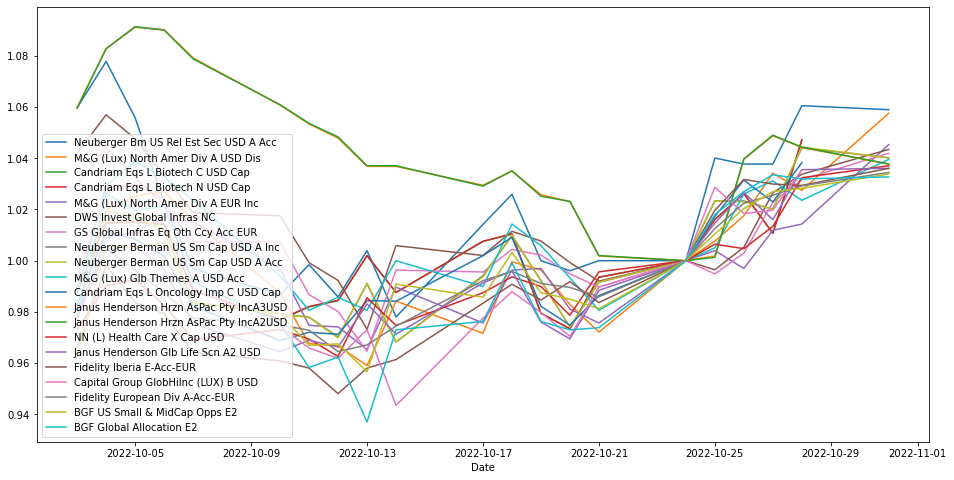

In [13]:
top_week = df_fund.sort_values(by='1 week',ascending=False).head(20)['symbol']
df_quote.apply(lambda x: x/df_quote.iloc[-6],axis=1)[top_week].rename(columns=s_to_n).plot(figsize=(16,8)).legend(loc=3)

In [14]:
df_fund[df_fund['symbol'].isin(top_week)].sort_values(by='my 1 month',ascending=False).head(20)

,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
221,LU1670628061:USD,M&G (Lux) North Amer Div A USD Dis,Ações EUA Dividendo,6,USD,0.1277,0.1172,0.1033,0.1388,0.0965,0.0323,US Equity Income,0.1787,0.593974,0.082949,0.139651,0.057606,0.096984
232,LU0090841858:USD,BGF US Small & MidCap Opps E2,Ações EUA Cap. Média,6,USD,0.1035,0.1286,0.1425,0.1095,0.0507,0.0386,US Mid-Cap Equity,0.1408,5.800321,0.074354,0.012819,0.033861,0.005838
46,LU0115765678:EUR,Fidelity Iberia E-Acc-EUR,Ações Espanha,6,EUR,-0.0289,-0.0378,-0.1239,0.0086,-0.0227,-0.0058,Spain Equity,0.1101,1.070518,0.072544,0.067766,0.036061,0.033686
223,LU1670627253:EUR,M&G (Lux) North Amer Div A EUR Inc,Ações EUA Dividendo,6,EUR,0.1291,0.1180,0.1088,0.1531,0.1025,0.0332,US Equity Income,0.1761,0.640010,0.069094,0.107958,0.045344,0.070849
38,LU0146259923:EUR,NN (L) Health Care X Cap USD,Ações Sector Saúde,6,USD,0.0566,0.0889,0.0776,0.0794,0.0237,0.0365,Global Equity Income,0.1064,10.454553,0.065727,0.006287,0.037080,0.003547
213,LU0108459040:USD,Candriam Eqs L Biotech C USD Cap,Ações Sector Biotecnologia,6,USD,0.0810,0.1178,0.0432,0.2772,0.1917,0.0722,Sector Equity Biotechnology,0.1824,13.612658,0.059963,0.004405,0.047187,0.003466
83,IE0002122038:EUR,Janus Henderson Glb Life Scn A2 USD,Ações Sector Saúde,6,USD,0.0481,0.0635,-0.1242,0.0062,0.0230,0.0213,Other Equity,0.1593,0.859969,0.059774,0.069507,0.036062,0.041934
215,LU0133359157:USD,Candriam Eqs L Biotech N USD Cap,Ações Sector Biotecnologia,6,USD,0.0760,0.1126,0.0383,0.2743,0.1903,0.0718,Sector Equity Biotechnology,0.1823,9.739802,0.059653,0.006125,0.047148,0.004841
155,LU1864481467:USD,Candriam Eqs L Oncology Imp C USD Cap,Ações Sector Saúde,6,USD,NaN,0.1277,0.0029,0.1878,0.0982,0.0266,Sector Equity Healthcare,0.1449,4.949195,0.056310,0.011378,0.038267,0.007732
161,LU0124386052:USD,BGF Global Allocation E2,Mistos Moderados USD,5,USD,0.1208,0.1893,-0.0427,0.1381,0.0891,0.0847,Sector Equity Alternative Energy,0.2409,0.353020,0.055184,0.156319,0.032733,0.092723


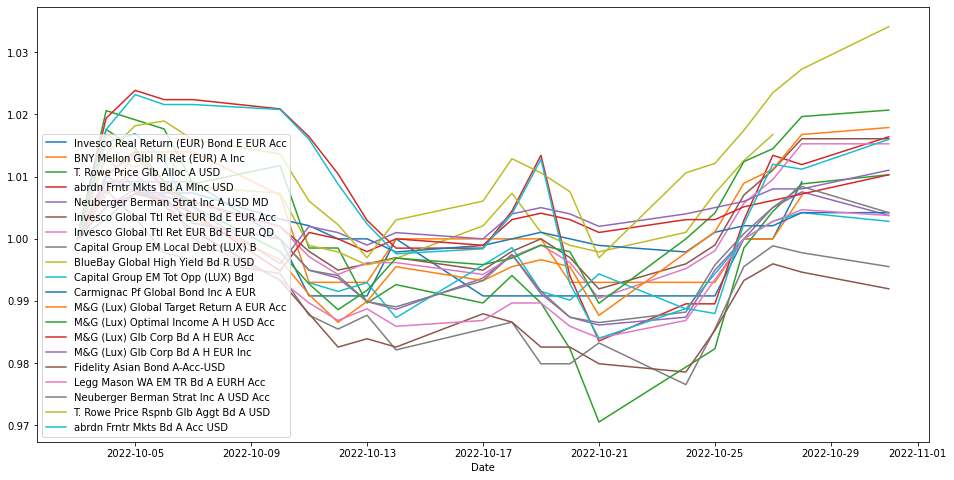

In [21]:
top_week = df_fund.sort_values(by='1 week racio',ascending=False).head(20)['symbol']
df_quote.apply(lambda x: x/df_quote.iloc[0],axis=1)[top_week].rename(columns=s_to_n).plot(figsize=(16,8)).legend(loc=3)

In [16]:
df_fund[df_fund['symbol'].isin(top_week)].sort_values(by='my 1 month',ascending=False).head(20)

,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
106,LU0860350221:USD,T. Rowe Price Rspnb Glb Aggt Bd A USD,Obrigações Globais,3,USD,0.0366,0.0170,0.0500,0.0575,0.0710,0.0304,Global High Yield Bond,0.0887,0.127105,0.034117,0.268414,0.023256,0.182965
71,LU1670725347:USD,M&G (Lux) Optimal Income A H USD Acc,Mistos Defensivos USD,4,USD,0.0262,0.0053,0.0426,0.0540,0.0479,0.0119,USD Cautious Allocation,0.0698,0.097365,0.020704,0.212642,0.020704,0.212642
49,LU1670724373:EUR,M&G (Lux) Global Target Return A EUR Acc,Alternativo Trading Macro EUR,4,EUR,-0.0272,-0.0440,-0.1268,-0.0615,-0.0286,-0.0148,EUR Cautious Allocation - Global,0.0702,0.089549,0.017897,0.199858,0.020179,0.225344
142,IE00B7FTJT25:USD,BlueBay Global High Yield Bd R USD,Obrigações Alto Rend. Globais,4,USD,-0.0099,-0.0292,0.0191,0.0522,0.0694,0.0262,USD High Yield Bond,0.0887,0.063715,0.016771,0.263225,0.015707,0.246515
138,LU0963865083:USD,abrdn Frntr Mkts Bd A MInc USD,Obrigações Emergentes Globais,4,USD,0.0161,-0.0191,-0.0677,-0.0231,0.0117,0.0911,Global Emerging Markets Bond,0.1285,0.081454,0.016418,0.201560,0.027149,0.333308
132,LU1625225237:EUR,Invesco Global Ttl Ret EUR Bd E EUR Acc,Obrigações Flexível Globais-EUR Hedged,3,EUR,-0.0077,-0.0243,-0.0667,-0.0257,-0.0240,-0.0021,Global Flexible Bond - EUR Hedged,0.0505,0.074874,0.016097,0.214981,0.020202,0.269812
139,LU1011993638:USD,abrdn Frntr Mkts Bd A Acc USD,Obrigações Emergentes Globais,4,USD,0.0212,-0.0142,-0.0630,-0.0207,0.0130,0.0917,Global Emerging Markets Bond,0.1286,0.150941,0.016000,0.106001,0.027508,0.182243
133,LU0534240741:EUR,Invesco Global Ttl Ret EUR Bd E EUR QD,Obrigações Flexível Globais-EUR Hedged,3,EUR,-0.0161,-0.0325,-0.0746,-0.0298,-0.0261,-0.0029,Global Flexible Bond - EUR Hedged,0.0504,0.079276,0.015282,0.192765,0.020154,0.254219
219,LU1797812986:EUR,M&G (Lux) Glb Corp Bd A H EUR Inc,Obrigações Corp. Globais - EUR Hedged,4,EUR,-0.0124,-0.0199,-0.0547,-0.0310,-0.0263,0.0140,Global High Yield Bond - EUR Hedged,0.0628,0.036095,0.011044,0.305974,0.007000,0.193932
218,LU1670722161:EUR,M&G (Lux) Glb Corp Bd A H EUR Acc,Obrigações Corp. Globais - EUR Hedged,4,EUR,-0.0189,-0.0266,-0.0612,-0.0346,-0.0280,0.0134,Global High Yield Bond - EUR Hedged,0.0626,0.035254,0.010309,0.292427,0.007194,0.204068


In [17]:
df_fund.groupby(by=['category']).mean().sort_values(by='1 week',ascending=False).head(20)

,risk,5 years,3 years,1 year,6 months,3 months,1 month,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
category,,,,,,,,,,,,,
Imobiliário Indirecto América do Norte,6.000000,0.073400,0.046200,0.071000,0.075700,0.058900,0.041000,0.218800,0.376704,-0.000742,-0.001969,0.058962,0.156521
Ações EUA Dividendo,6.000000,0.128400,0.117600,0.106050,0.145950,0.099500,0.032750,0.177400,0.616992,0.076022,0.123805,0.051475,0.083916
Ações EUA Cap. Pequena,6.000000,0.122700,0.115100,0.042500,0.101050,0.161350,0.061650,0.167200,0.442003,0.051122,0.121355,0.040174,0.095388
Imobiliário Indirecto Ásia,6.000000,0.028250,-0.022200,-0.038550,0.038800,0.013650,0.012350,0.100650,0.349528,-0.020738,-0.061022,0.037751,0.110983
Ações Sector Biotecnologia,6.000000,0.098900,0.120400,-0.013567,0.189433,0.168300,0.057900,0.191333,8.796807,0.049038,0.006527,0.036810,0.004535
Ações Europa,6.000000,0.032500,0.046000,-0.020400,0.038700,-0.011500,0.016300,0.107200,0.396295,0.054846,0.138396,0.034465,0.086967
Ações EUA Cap. Média,6.000000,0.103500,0.128600,0.142500,0.109500,0.050700,0.038600,0.140800,5.800321,0.074354,0.012819,0.033861,0.005838
Ações Sector Infra-estrutura,5.600000,0.070660,0.092920,0.281040,0.202460,0.038280,0.069860,0.181560,1.189576,0.043912,0.156884,0.032465,0.071904
Ações Sector Saúde,6.000000,0.049375,0.075280,-0.027620,0.070920,0.029140,0.019160,0.132560,8.727496,0.061493,0.029245,0.030949,0.015119


In [18]:
top_cat = df_fund.groupby(by=['category']).mean().sort_values(by='1 week',ascending=False).head(20)
df_fund[df_fund['category'].isin(top_cat.index)].groupby(by=['category']).count()['symbol'].sort_values(ascending=False)

category
Ações Global Cap. Grande Misto            11
Ações Europa Cap. Grande Misto             7
Ações Sector Saúde                         5
Ações Sector Infra-estrutura               5
Ações Sector Biotecnologia                 3
Ações Japão Cap. Peq/Média                 3
Imobiliário Indirecto Ásia                 2
Ações EUA Cap. Pequena                     2
Ações EUA Dividendo                        2
Ações Tailândia                            2
Ações EUA Cap. Grande Valor                2
Ações Alemanha                             1
Imobiliário Indirecto América do Norte     1
Ações Global Cap. Grande Valor             1
Ações Japão Cap. Grande                    1
Ações Europa Cap. Pequena                  1
Ações Europa Cap. Flexível                 1
Ações Europa                               1
Ações EUA Cap. Média                       1
Obrigações Flexível Globais-USD Hedged     1
Name: symbol, dtype: int64

In [19]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(df_quote)
S = CovarianceShrinkage(df_quote).ledoit_wolf()

In [20]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
cleaned_weights

SolverError: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.

In [ ]:
df_port = df_fund[df_fund['symbol'].isin([s for s,_ in cleaned_weights])]
df_port.sort_values(by='1 month racio',ascending=False)

,symbol,name,category,risk,currency,5 years,3 years,1 year,6 months,3 months,1 month,ft category,1 year std,1 month std,my 1 month,1 month racio,1 week,1 week racio
33,IE00BLP5S460:EUR,JupiterMerian Glb Eq AbsRt L € H Acc,Alternativo Market Neutral - Ações EUR,4,EUR,-0.0290,0.0012,0.0440,0.0098,-0.0293,-0.0104,Equity Market Neutral EUR,0.0834,0.011233,0.022556,2.007966,0.000000,0.000000
59,LU1046545411:USD,GS Global Infras Eq Base Acc USD,Ações Sector Infra-estrutura,5,USD,0.1125,0.1878,0.8074,0.3710,0.0833,0.1592,Sector Equity Energy,0.2712,0.402375,0.117008,0.290795,0.023204,0.057669
26,LU1460782227:EUR,HSBC GIF Global Bond Total Ret AC,Obrigações Flexível Globais,3,USD,-0.0034,-0.0275,-0.0206,0.0152,-0.0087,0.0116,Multistrategy EUR,0.0801,0.071200,0.016838,0.236490,0.002768,0.038870
40,LU0784438805:EUR,BPI GIF Iberia R,Ações Espanha,6,EUR,-0.0062,-0.0066,-0.0360,-0.0019,-0.0191,-0.0134,Equity Market Neutral EUR,0.0589,0.055355,0.012579,0.227234,0.007037,0.127120
0,LU0213962813:EUR,HSBC GIF Turkey Equity EC,Ações Turquia,7,EUR,-0.0153,0.1053,0.3439,0.5925,0.2867,0.2612,Turkey Equity,0.3969,2.052404,0.190628,0.092881,0.086140,0.041970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,LU0132385534:GBP,Fidelity US High Yield A-Dis-USD,Obrigações Alto Rend. USD,4,USD,0.0401,0.0237,0.0761,0.0785,0.0729,0.0225,USD High Yield Bond,0.0792,0.248071,-0.038889,-0.156765,-0.007885,-0.031787
239,LU1670628905:USD,M&G (Lux) Glb Themes A USD Acc,Ações Global Cap. Grande Misto,6,USD,NaN,0.1030,0.0356,0.0864,0.0433,0.0208,Global Large-Cap Blend Equity,0.1371,0.213244,-0.039571,-0.185569,-0.019360,-0.090789
60,LU1512665842:EUR,GS Global Infras Eq Oth Ccy Acc EUR,Ações Sector Infra-estrutura,5,EUR,0.0715,0.0638,0.1948,0.2125,0.0614,0.0671,Sector Equity Infrastructure,0.1695,0.380202,-0.072464,-0.190593,-0.006652,-0.017496
10,LU0837970705:USD,abrdn China A Share Sus Eq A Acc USD,Ações China - A Shares,6,USD,0.0218,-0.0161,-0.1712,-0.0931,0.0561,-0.0640,China Equity,0.2067,0.315573,-0.076852,-0.243531,-0.046845,-0.148445
